  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Linear Regression R2 Score: 0.6607215593966528
Random Forest R2 Score: 0.47217718510585627

MAE: 1.5215000000000014
MSE: 3.5595784166666724


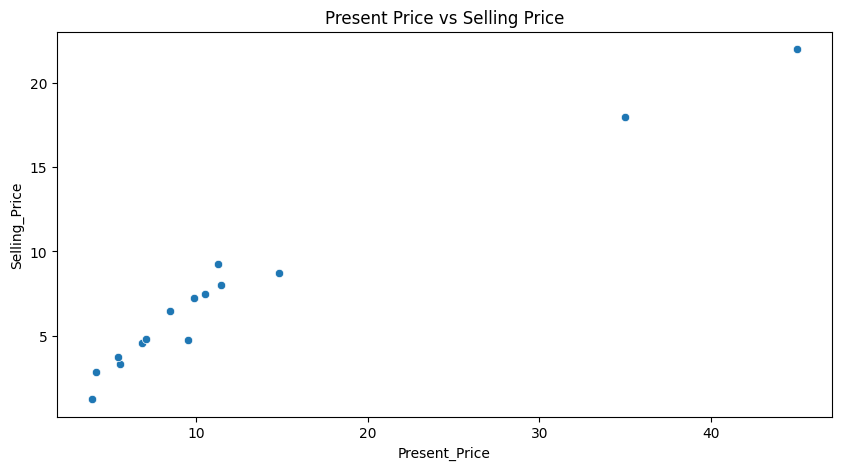


Task 3 Completed Successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load uploaded CSV
df = pd.read_csv("/content/CarPrice.csv")
print(df.head())

# DROP Car_Name (cannot be converted to numeric)
df = df.drop("Car_Name", axis=1)

# Encode categorical columns
le = LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])
df["Seller_Type"] = le.fit_transform(df["Seller_Type"])
df["Transmission"] = le.fit_transform(df["Transmission"])

# Split data
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train models
lr = LinearRegression()
rf = RandomForestRegressor()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
pred_lr = lr.predict(X_test)
pred_rf = rf.predict(X_test)

# Evaluation
print("\nLinear Regression R2 Score:", r2_score(y_test, pred_lr))
print("Random Forest R2 Score:", r2_score(y_test, pred_rf))

print("\nMAE:", mean_absolute_error(y_test, pred_rf))
print("MSE:", mean_squared_error(y_test, pred_rf))

# Visualization
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Present_Price"], y=df["Selling_Price"])
plt.title("Present Price vs Selling Price")
plt.show()

print("\nTask 3 Completed Successfully!")
